# Data Source

The datasets (train.csv and test.csv) were sourced from https://www.kaggle.com/competitions/titanic/data.

In [1]:
# List all files under input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Importation of Necessary Packages

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold, cross_val_score

import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

# Initial Data Exploration

## Training Data

In [3]:
# Read the csv file into train_data dataframe
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
# Check first five rows of train_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Get an overview of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The train_data dataframe has 891 rows and 12 columns. Of the 12 columns, 7 are  numerical, and 5 are non-numerical. There are missing values in the following columns: Age, Cabin, and Embarked.

In [6]:
# Get summary statistics of the numerical columns of train_data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The range of values in each numerical column of train_data makes sense.

In [7]:
# Get summary statistics of the object columns of train_data
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


The most frequent class in the Sex column is male, while the most frequent class in the Embarked column is S for Southampton.

In [8]:
# Check number of unique values in each column of train_data
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The number of unique values in each of the Survived, Pclass, Sex, and Embarked columns of train_data is as expected.

In [9]:
# See unique values in select columns of train_data
for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print("Unique values in {}: {}".format(col, train_data[col].unique()))

Unique values in Survived: [0 1]
Unique values in Pclass: [3 1 2]
Unique values in Sex: ['male' 'female']
Unique values in SibSp: [1 0 3 4 2 5 8]
Unique values in Parch: [0 1 2 5 3 4 6]
Unique values in Embarked: ['S' 'C' 'Q' nan]


## Test Data

In [10]:
# Read the csv file into test_data dataframe
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [11]:
# Check first five rows of test_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Get an overview of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The test_data dataframe has 418 rows and 11 columns. Unlike train_data, it has no Survived column. Of the 11 columns it has, 6 are  numerical, and 4 are non-numerical. There are missing values in the following columns: Age, Fare, Cabin, and Embarked.

In [13]:
# Get summary statistics of the numerical columns of test_data
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The range of values in each numerical column of test_data makes sense.

In [14]:
# Get summary statistics of the object columns of test_data
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Similar to train_data, the most frequent class in the Sex column of test_data is male, while the most frequent class in the Embarked column of test_data is S for Southampton.

In [15]:
# Check number of unique values in each column of test_data
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

The number of unique values in each of the Pclass, Sex, and Embarked columns of test_data is as expected.

In [16]:
# See unique values in select columns of test_data
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print("Unique values in {}: {}".format(col, test_data[col].unique()))

Unique values in Pclass: [3 2 1]
Unique values in Sex: ['male' 'female']
Unique values in SibSp: [0 1 2 3 4 5 8]
Unique values in Parch: [0 1 3 2 4 6 5 9]
Unique values in Embarked: ['Q' 'S' 'C']


# Data Preprocessing

## Handling Missing Values

In [17]:
# Determine number of missing values in each column of train_data
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In train_data, the Age column has 177 missing values, the Cabin column has 687 missing values, and the Embarked column has 2 missing values. There are too many missing values in the Cabin colum.

In [18]:
# Determine number of missing values in each column of test_data
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In test_data, the Age column has 86 missing values, the Fare column has 1 missing value, and the Cabin column has 327 missing values.

In [19]:
# Determine percentage of missing values in each column of train_data
train_data.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In train_data, 19.86% of values in the Age column are missing, 77.10% of values in the Cabin column are missing, and 0.22% of values in the Embarked column are missing.

In [20]:
# Determine percentage of missing values in each column of test_data
test_data.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In test_data, 20.57% of values in the Age column are missing, 0.24% of values in the Fare column is missing, and 78.23% of values in the Cabin column are missing.

In [21]:
# Determine number of rows with missing values in train_data
train_data.isna().any(axis=1).sum()

708

Of 891 rows in train_data, 708 have at least one missing value. 

In [22]:
# Determine number of rows with missing values in test_data
test_data.isna().any(axis=1).sum()

331

Of 418 rows in test_data, 331 have at least one missing value.

In [23]:
# Determine percentage of rows in train_data with missing values
train_data.isna().any(axis=1).mean()

0.7946127946127947

Of 891 rows in train_data, 79.46% have at least one missing value.

In [24]:
# Determine percentage of rows in test_data with missing values
test_data.isna().any(axis=1).mean()

0.7918660287081339

Of 418 rows in test_data, 79.19% have at least one missing value.

### Age

<Axes: xlabel='Age', ylabel='Count'>

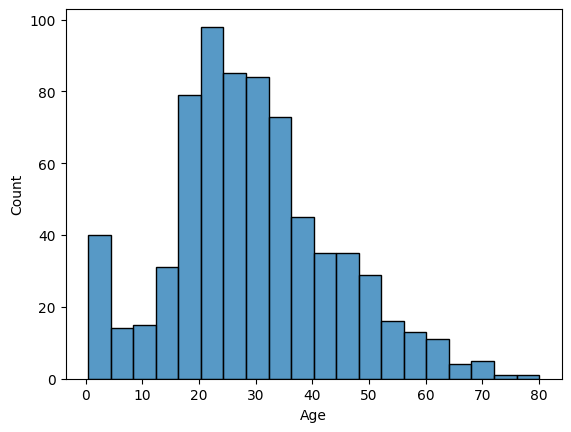

In [25]:
# Create histogram of Age column of train_data
sns.histplot(data=train_data, x='Age')

The distribution of Age does not look skewed.

In [26]:
# Compute skewness of Age column of train_data
print("Skewness of Age: {}".format(skew(train_data['Age'])))

Skewness of Age: nan


This confirms that the distribution of Age is negligibly skewed.

In [27]:
# Compute the mean of the Age column of train_data
age_mean = train_data['Age'].mean()

# Fill missing Age values in train_data and test_data with age_mean
train_data['Age'] = train_data['Age'].fillna(age_mean)
test_data['Age'] = test_data['Age'].fillna(age_mean)

### Fare

<Axes: xlabel='Fare', ylabel='Count'>

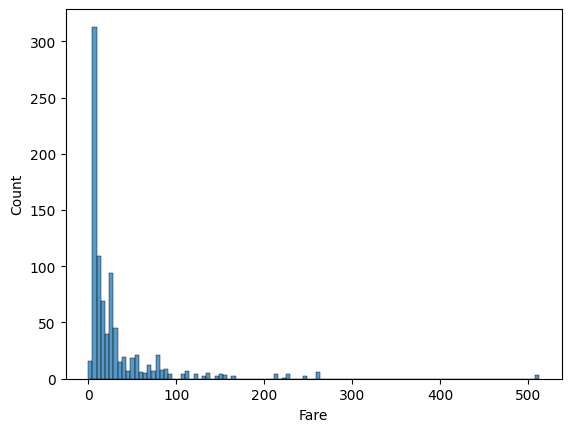

In [28]:
# Create histogram of Fare column of train_data
sns.histplot(data=train_data, x='Fare')

The distribution of Fare is skewed to the right.

In [29]:
# Compute skewness of Fare column of train_data
print("Skewness of Fare: {}".format(skew(train_data['Fare'])))

Skewness of Fare: 4.7792532923723545


This shows that the distribution of Fare is highly skewed.

In [30]:
# Compute the median of the Fare column of train_data
fare_median = train_data['Fare'].median()

# Fill missing Fare values in test_data with fare_median
test_data['Fare'] = test_data['Fare'].fillna(fare_median)

### Embarked

<Axes: xlabel='Embarked', ylabel='count'>

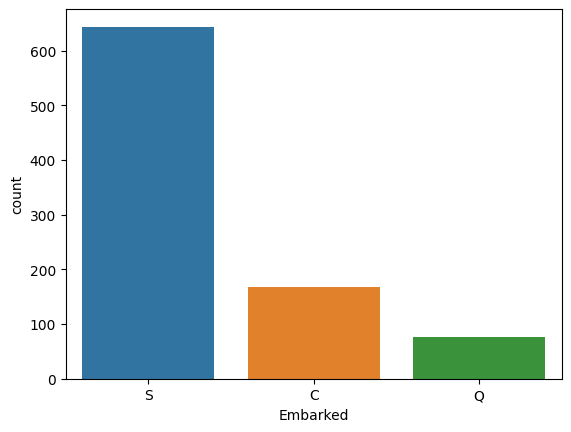

In [31]:
# Create countplot of Embarked column of train_data
sns.countplot(data=train_data, x='Embarked')

The most frequent port of embarkation is S for Southampton.

In [32]:
# Fill missing Embarked values in train_data with mode 'S'
train_data['Embarked'] = train_data['Embarked'].fillna('S')

### Cabin

The Cabin column may hold some significance in predicting survival, but it has too many missing values for it to be useful. It has to be dropped. There are other features anyway (e.g., Pclass and Fare) that could be used in place of Cabin. The higher the ticket class and fare, the more premium the cabin is expected to be.

In [33]:
# Drop Cabin column from train_data and test_data
for dataset in [train_data, test_data]:
    dataset.drop(columns='Cabin', inplace=True)

In [34]:
# Confirm that there are no more columns with missing values in train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [35]:
# Confirm that there are no more columns with missing values in test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## Encoding Categorical Variables

### Sex

In [36]:
# Encode Sex in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Embarked

In [37]:
# Encode Embarked in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [38]:
# Get overview of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [39]:
# Get overview of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [40]:
# See unique values in Sex and Embarked columns of train_data
for col in ['Sex', 'Embarked']:
    print("Unique values in {}: {}".format(col, train_data[col].unique()))

Unique values in Sex: [0 1]
Unique values in Embarked: [0 1 2]


In [41]:
# See unique values in Sex and Embarked columns of test_data
for col in ['Sex', 'Embarked']:
    print("Unique values in {}: {}".format(col, test_data[col].unique()))

Unique values in Sex: [0 1]
Unique values in Embarked: [2 0 1]


# Feature Engineering

## Title

The Title feature may hold some clues to the prediction of survival. For example, those with more prestigious titles and female titles may be prioritized in the evacuation and consequently have a higher chance of survival.

In [42]:
# Create Title feature for both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [43]:
# Get frequency of each title in train_data
train_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [44]:
# Check for missing values in Title column of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [45]:
# Check for missing values in Title column of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [46]:
# Replace Mlle with Miss, Ms with Miss, and Mme with Mrs in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Replace any other title with 'Other'
for dataset in [train_data, test_data]:
    dataset.loc[~dataset['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master']), 'Title'] = 'Other'

In [47]:
# Compute survival rate by title in train_data
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)

,Title,Survived
0,Mrs,0.793651
1,Miss,0.702703
2,Master,0.575000
3,Other,0.347826
4,Mr,0.156673


Passengers with a title of Mr have a far lower chance of survival compared to passengers with the following titles: Mrs, Miss, and Master.

<Axes: xlabel='Title', ylabel='Survived'>

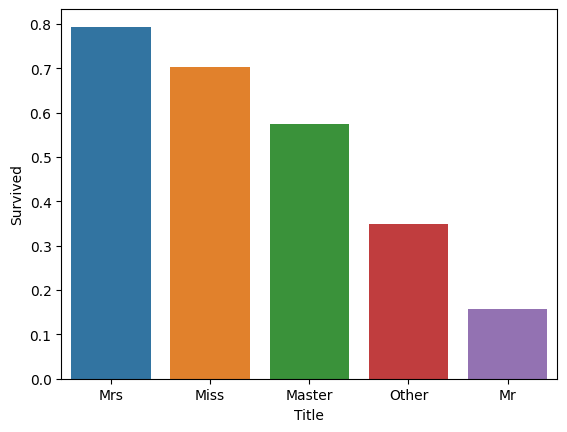

In [48]:
# Create barplot of Title versus Survived in train_data
sns.barplot(x='Title', y='Survived', data=train_data, errorbar=None, order=['Mrs', 'Miss', 'Master', 'Other', 'Mr'])

In [49]:
# Map titles to number codes in both train_data and test_data
title_mapping = {"Mrs": 0, "Miss": 1, "Master": 2, "Other": 3, "Mr": 4}
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [50]:
# Drop Name column from train_data and test_data
for dataset in [train_data, test_data]:
    dataset.drop(columns='Name', inplace=True)

## IsMr

IsMr denotes whether the passenger has a title of Mr. IsMr is 1 if title of passenger is Mr. Otherwise, it is 0.

In [51]:
# Create IsMr feature for train_data and test_data
for dataset in [train_data, test_data]:
    dataset['IsMr'] = 0
    dataset.loc[dataset['Title'] == 4, 'IsMr'] = 1

In [52]:
# Compute survival rate by IsMr in train_data
print (train_data[['IsMr', 'Survived']].groupby(['IsMr'], as_index=False).mean())

   IsMr  Survived
0     0  0.697861
1     1  0.156673


<Axes: xlabel='IsMr', ylabel='Survived'>

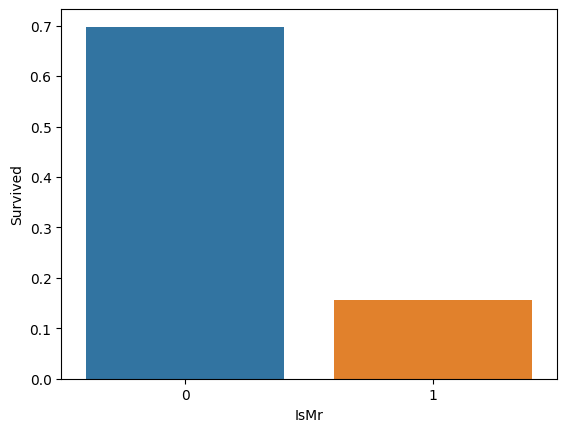

In [53]:
# Create barplot of IsMr versus Survived in train_data
sns.barplot(x='IsMr', y='Survived', data=train_data, errorbar=None)

## AgeGroup

The AgeGroup feature may hold some clues to the prediction of survival. For example, the elderly or senior citizens may have a far lower chance of survival compared to younger passengers.

In [54]:
# Convert data type of Age to integer in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['Age'] = dataset['Age'].astype(int)

# Set the number of bands (bins)
num_age_bands = 5

# Create AgeBand using pd.cut()
train_data['AgeBand'] = pd.cut(train_data['Age'], bins=num_age_bands)

# Compute survival rate by AgeBand
print(train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


Passengers whose age falls within (64.0, 80.0] have a far lower chance of survival compared to younger passengers.

<Axes: xlabel='AgeBand', ylabel='Survived'>

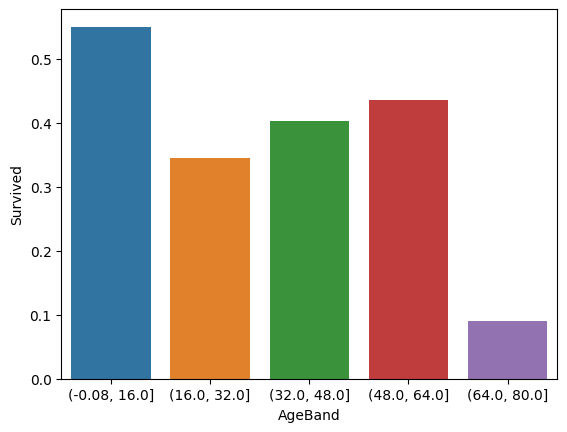

In [55]:
# Create barplot of AgeBand versus Survived in train_data
sns.barplot(x='AgeBand', y='Survived', data=train_data, errorbar=None)

In [56]:
# Map Age to AgeGroup in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['AgeGroup'] = pd.Series()
    dataset.loc[dataset['Age'] <= 16, 'AgeGroup'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'AgeGroup'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'AgeGroup'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'AgeGroup'] = 3
    dataset.loc[ dataset['Age'] > 64, 'AgeGroup'] = 4

In [57]:
# Drop AgeBand column from train_data
train_data.drop(columns='AgeBand', inplace=True)

## IsElderly

IsElderly denotes whether the passenger is an elderly (i.e., 65 years old or older). IsElderly is 1 if age of passenger is at least 65 and 0 if age of passenger is below 65.

In [58]:
# Create IsElderly feature for train_data and test_data
for dataset in [train_data, test_data]:
    dataset['IsElderly'] = 0
    dataset.loc[dataset['Age'] >= 65, 'IsElderly'] = 1

In [59]:
# Compute survival rate by IsElderly in train_data
print (train_data[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean())

   IsElderly  Survived
0          0  0.387500
1          1  0.090909


<Axes: xlabel='IsElderly', ylabel='Survived'>

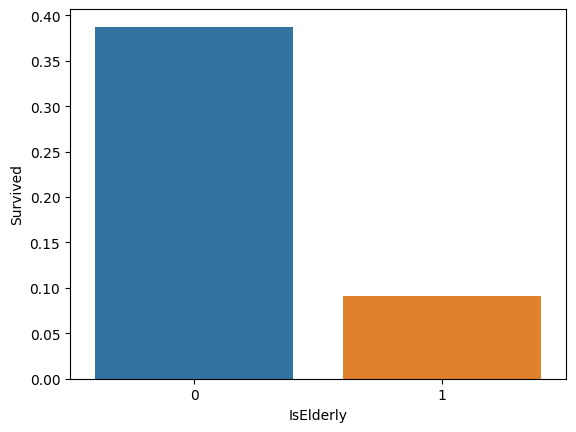

In [60]:
# Create barplot of IsElderly versus Survived in train_data
sns.barplot(x='IsElderly', y='Survived', data=train_data, errorbar=None)

## FamilySize

FamilySize represents the number of people who belong to the same family and may hold clues to the prediction of survival. The number of includes the passenger, their siblings and spouse, and their parents and children. Passengers with a stronger support system may have a higher chance of survival.

In [61]:
# Create FamilySize feature for both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [62]:
# Compute survival rate by FamilySize in train_data
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<Axes: xlabel='FamilySize', ylabel='Survived'>

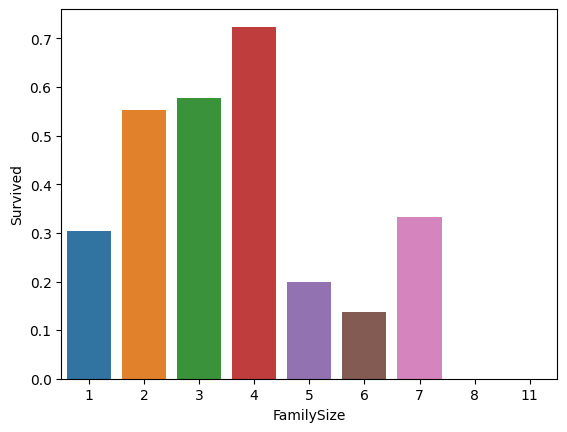

In [63]:
# Create barplot of FamilySize versus Survived in train_data
sns.barplot(x='FamilySize', y='Survived', data=train_data, errorbar=None)

Passengers with a family size of 2 to 4 have a higher chance of survival, while passengers who are alone or have a larger family size of 5 to 7 have a lower chance of survival.

## IsAlone

IsAlone denotes whether the passenger is traveling alone or with family. IsAlone is 1 if passenger travels alone and 0 if passenger travels with family.

In [64]:
# Create IsAlone feature for train_data and test_data
for dataset in [train_data, test_data]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [65]:
# Compute survival rate by IsAlone in train_data
print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


<Axes: xlabel='IsAlone', ylabel='Survived'>

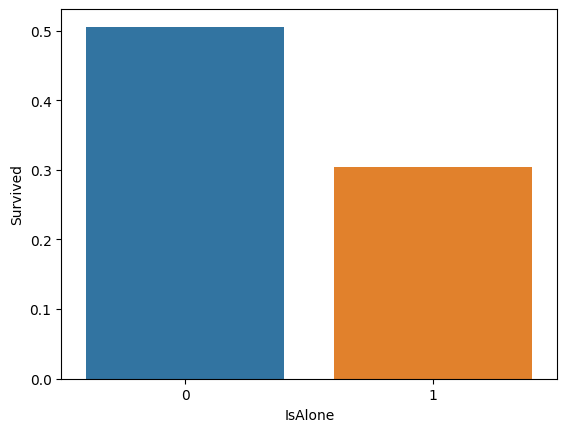

In [66]:
# Create barplot of IsAlone versus Survived in train_data
sns.barplot(x='IsAlone', y='Survived', data=train_data, errorbar=None)

## FareGroup

In [67]:
# Set the number of quantiles
num_fare_quantiles = 4

# Create FareBand using pd.cut()
train_data['FareBand'] = pd.qcut(train_data['Fare'], q=num_fare_quantiles)

# Compute survival rate by AgeBand
print(train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


The chance of survival increases as the fare band increases.

<Axes: xlabel='FareBand', ylabel='Survived'>

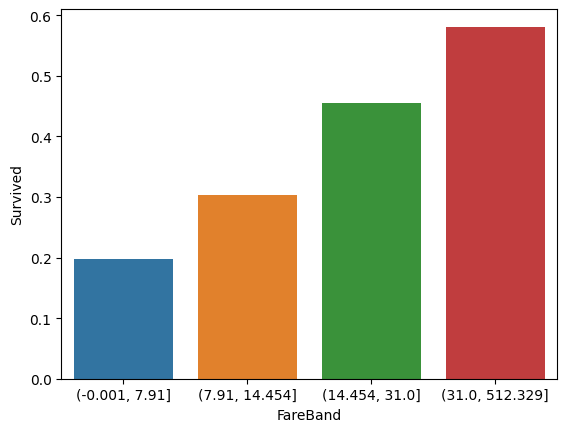

In [68]:
# Create barplot of FareBand versus Survived in train_data
sns.barplot(x='FareBand', y='Survived', data=train_data, errorbar=None)

In [69]:
# Map Fare to FareGroup in both train_data and test_data
for dataset in [train_data, test_data]:
    dataset['FareGroup'] = pd.Series()
    dataset.loc[dataset['Fare'] <= 7.91, 'FareGroup'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'FareGroup'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'FareGroup'] = 2
    dataset.loc[ dataset['Fare'] > 31.0, 'FareGroup'] = 3

In [70]:
# Drop FareBand column from train_data
train_data.drop(columns='FareBand', inplace=True)

In [71]:
# Check first few rows of train_data
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
0,1,0,3,0,22,1,0,A/5 21171,7.2500,0,4,1,1,0,2,0,0
1,2,1,1,1,38,1,0,PC 17599,71.2833,1,0,0,2,0,2,0,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,1,1,1
3,4,1,1,1,35,1,0,113803,53.1000,0,0,0,2,0,2,0,3
4,5,0,3,0,35,0,0,373450,8.0500,0,4,1,2,0,1,1,1


In [72]:
# Check first few rows of test_data
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
0,892,3,0,34,0,0,330911,7.8292,2,4,1,2,0,1,1,0
1,893,3,1,47,1,0,363272,7.0000,0,0,0,2,0,2,0,0
2,894,2,0,62,0,0,240276,9.6875,2,4,1,3,0,1,1,1
3,895,3,0,27,0,0,315154,8.6625,0,4,1,1,0,1,1,1
4,896,3,1,22,1,1,3101298,12.2875,0,0,0,1,0,3,0,1


PassengerId, which is unique to each passenger and is just an identifier, does not contribute to the prediction of each passenger's survival. Consequently, it has to be dropped from both train_data and test_data.

Ticket, which represents the ticket number, has 681 unique values in train_data, which has 891 rows in total. It may hold some clues, but similar to Cabin, it can be dropped from train_data and test_data. Whatever relevant information may be in this column is expected to be better provided by Pclass and Fare. Pclass represents the ticket class.

Survived is the target variable so it has to be dropped from train_data. 

Age can be dropped from train_data and test_data because it is different in scale from the rest of the features and AgeGroup was already created.

Fare can be dropped from train_data and test_data because it is different in scale from the rest of the features and FareGroup was already created.

In [73]:
# Define X_train, X_test, and y_train
X_train = train_data.drop(columns=['PassengerId', 'Survived', 'Age', 'Ticket', 'Fare'], inplace=False)
X_test = test_data.drop(columns=['PassengerId', 'Age', 'Ticket', 'Fare'], inplace=False)
y_train = train_data['Survived']

In [74]:
# Check shape of X_train, X_test, and y_train
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (891, 12)
Shape of y_train:  (891,)
Shape of X_test:  (418, 12)


In [75]:
# Check remaining features in X_train
X_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup'],
      dtype='object')

In [76]:
# Check remaining features in X_test
X_test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup'],
      dtype='object')

# Exploratory Data Analysis

## Relationships Among Features

In [77]:
# Create a correlation matrix of train_features
correlation_matrix_features = X_train.corr()
correlation_matrix_features

,Pclass,Sex,SibSp,Parch,Embarked,Title,IsMr,AgeGroup,IsElderly,FamilySize,IsAlone,FareGroup
Pclass,1.000000,-0.131900,0.083081,0.018443,0.045702,0.137035,0.142698,-0.358005,-0.077787,0.065997,0.135207,-0.628459
Sex,-0.131900,1.000000,0.114631,0.245489,0.116569,-0.944195,-0.867334,-0.071125,-0.082477,0.200988,-0.303646,0.248940
SibSp,0.083081,0.114631,1.000000,0.414838,-0.059961,-0.202135,-0.250489,-0.218846,-0.043834,0.890712,-0.584471,0.394248
Parch,0.018443,0.245489,0.414838,1.000000,-0.078665,-0.330014,-0.333905,-0.134014,-0.027725,0.783111,-0.583398,0.393048
Embarked,0.045702,0.116569,-0.059961,-0.078665,1.000000,-0.093645,-0.113971,-0.051975,0.048390,-0.080281,0.017807,-0.091096
Title,0.137035,-0.944195,-0.202135,-0.330014,-0.093645,1.000000,0.944440,0.097245,0.083549,-0.303022,0.411560,-0.316181
IsMr,0.142698,-0.867334,-0.250489,-0.333905,-0.113971,0.944440,1.000000,0.145364,0.074497,-0.338014,0.396920,-0.323790
AgeGroup,-0.358005,-0.071125,-0.218846,-0.134014,-0.051975,0.097245,0.145364,1.000000,0.373544,-0.216525,0.124650,0.096773
IsElderly,-0.077787,-0.082477,-0.043834,-0.027725,0.048390,0.083549,0.074497,0.373544,1.000000,-0.043810,0.049234,0.013137
FamilySize,0.065997,0.200988,0.890712,0.783111,-0.080281,-0.303022,-0.338014,-0.216525,-0.043810,1.000000,-0.690922,0.465815


<Axes: >

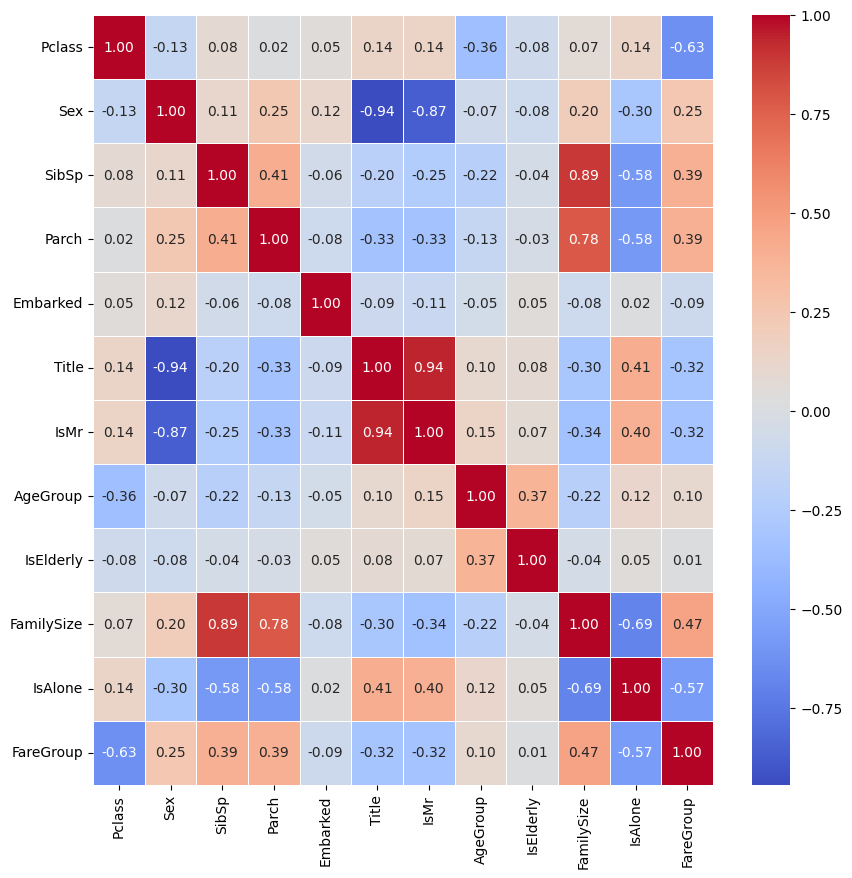

In [78]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [79]:
# Set correlation thresholds
highly_correlated_threshold = 0.7
moderately_correlated_threshold = 0.5

# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs = []

# Define function to determine correlation level
def get_correlation_level(correlation_value):
    if abs(correlation_value) >= highly_correlated_threshold:
        return 'Highly correlated'
    elif abs(correlation_value) >= moderately_correlated_threshold:
        return 'Moderately correlated'
    else:
        return None

# Iterate through pairs of features and accumulate moderately and highly correlated pairs
for i in range(len(correlation_matrix_features.columns)):
    for j in range(i + 1, len(correlation_matrix_features.columns)):
        feature1, feature2 = correlation_matrix_features.columns[i], correlation_matrix_features.columns[j]
        correlation_value = correlation_matrix_features.loc[feature1, feature2]
        correlation_level = get_correlation_level(correlation_value)
        
        if correlation_level is not None:
            correlated_pairs.append({'Feature 1': feature1,
                                     'Feature 2': feature2,
                                     'Correlation Value': correlation_value,
                                     'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_df = pd.DataFrame(correlated_pairs)

print(correlated_pairs_df)

    Feature 1   Feature 2  Correlation Value      Correlation Level
0      Pclass   FareGroup          -0.628459  Moderately correlated
1         Sex       Title          -0.944195      Highly correlated
2         Sex        IsMr          -0.867334      Highly correlated
3       SibSp  FamilySize           0.890712      Highly correlated
4       SibSp     IsAlone          -0.584471  Moderately correlated
5       Parch  FamilySize           0.783111      Highly correlated
6       Parch     IsAlone          -0.583398  Moderately correlated
7       Title        IsMr           0.944440      Highly correlated
8  FamilySize     IsAlone          -0.690922  Moderately correlated
9     IsAlone   FareGroup          -0.568942  Moderately correlated


## Relationships Between Target Variable and Each Feature

In [80]:
# Create a matrix of correlation between target variable and each feature
correlation_with_target = X_train.apply(lambda feature: feature.corr(y_train)).sort_values(ascending=False)
correlation_with_target

Sex           0.543351
FareGroup     0.295875
Embarked      0.106811
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
AgeGroup     -0.044492
IsElderly    -0.067344
IsAlone      -0.203367
Pclass       -0.338481
IsMr         -0.549199
Title        -0.565716
dtype: float64

In [81]:
# List to store correlated pairs, correlation values, and correlation levels
correlated_pairs_target = []

# Iterate through features and calculate correlation with the target variable 'Survived'
for feature in correlation_with_target.index:
    correlation_value = correlation_with_target.loc[feature]
    correlation_level = get_correlation_level(correlation_value)
    
    if correlation_level is not None:
        correlated_pairs_target.append({'Feature': feature,
                                        'Target Variable': 'Survived',
                                        'Correlation Value': correlation_value,
                                        'Correlation Level': correlation_level})

# Convert the list of dictionaries into a DataFrame
correlated_pairs_target_df = pd.DataFrame(correlated_pairs_target)

print(correlated_pairs_target_df)

  Feature Target Variable  Correlation Value      Correlation Level
0     Sex        Survived           0.543351  Moderately correlated
1    IsMr        Survived          -0.549199  Moderately correlated
2   Title        Survived          -0.565716  Moderately correlated


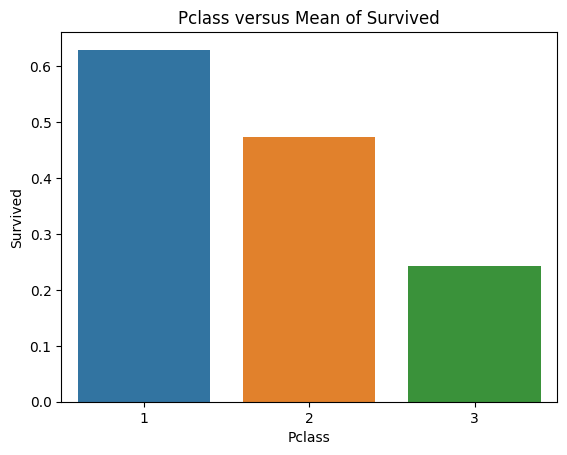

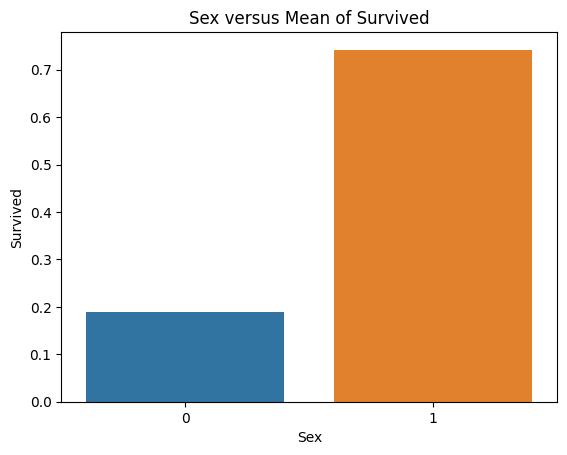

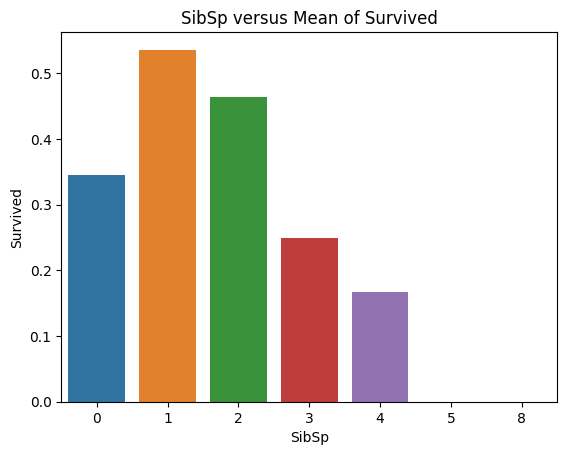

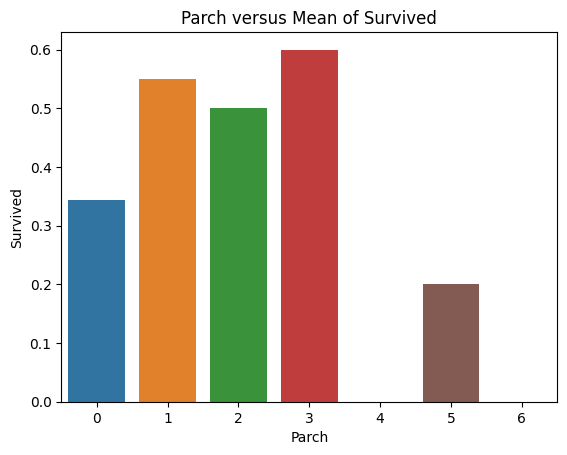

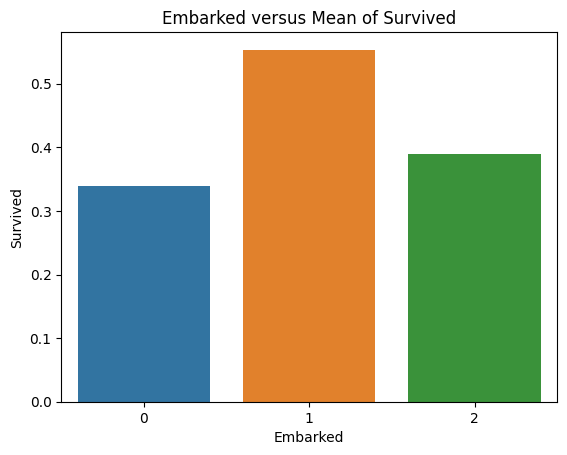

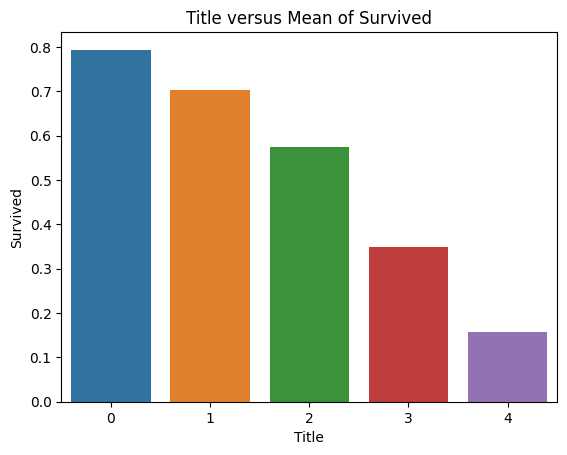

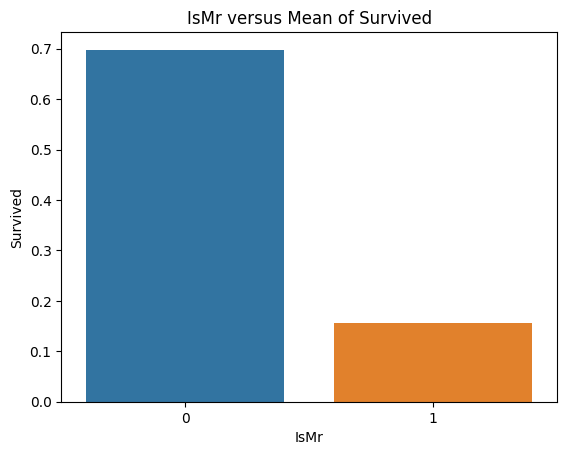

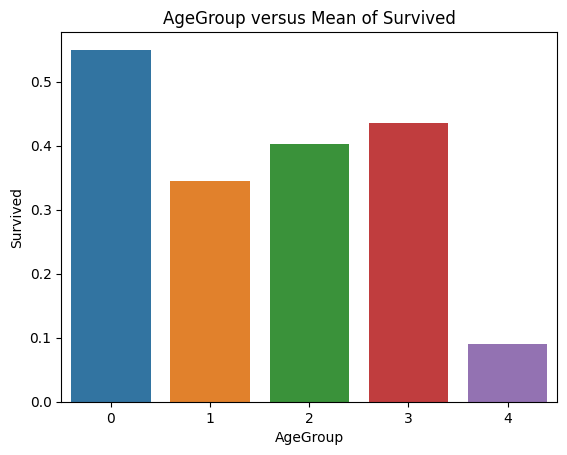

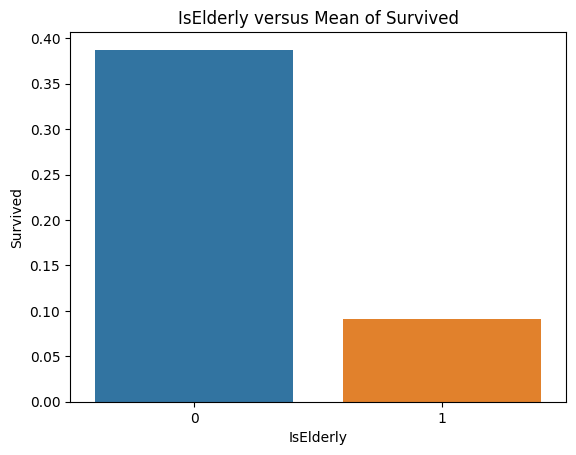

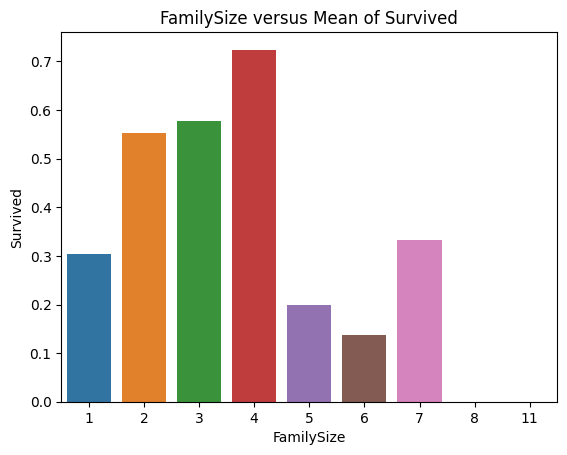

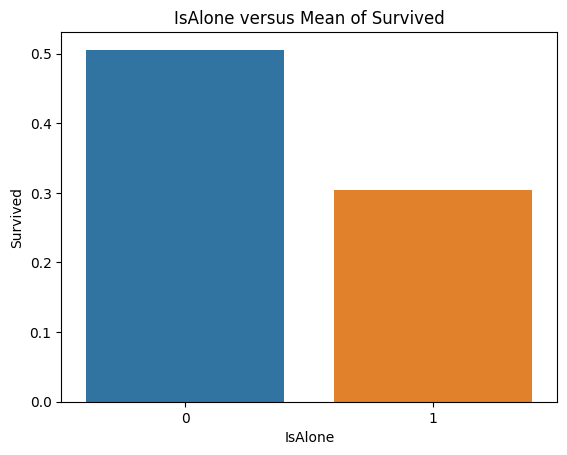

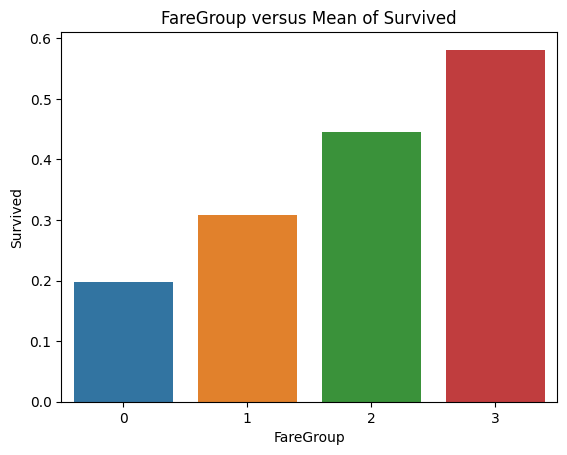

In [82]:
# Iterate over each feature in X_train
for feature in X_train.columns:
    # Create barplot for current feature versus Survived
    sns.barplot(x=X_train[feature], y=y_train, errorbar=None)
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(f'{feature} versus Mean of Survived')
    plt.show()

# Model Development and Evaluation

## Model 1 - Logistic Regression, 12 Features, No Cross-Validation, No Hyperparameter Tuning

In [83]:
# Select features to be used
features_model1 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model1 = X_train[features_model1]
y_train_model1 = y_train
X_test_model1 = X_test[features_model1]

# Instantiate model
model1 = LogisticRegression()

# Train model
model1.fit(X_train_model1, y_train_model1)

# Get the coefficients of the model
coefficients_model1 = model1.coef_[0]

# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df_model1 = pd.DataFrame({'Feature': X_train_model1.columns, 'Coefficient': coefficients_model1})

# Sort the coefficients to identify the most important features
coefficients_df_model1 = coefficients_df_model1 = coefficients_df_model1.reindex(coefficients_df_model1['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

# Print coefficients
print(coefficients_df_model1)
print("\n")

# Compute training set accuracy of model
train_accuracy_model1 = model1.score(X_train_model1, y_train_model1)

# Print training set accuracy of model
print ("Training set accuracy:", train_accuracy_model1)

# Predict on the test set using the model
y_pred_model1 = model1.predict(X_test_model1)

       Feature  Coefficient
0       Pclass    -0.944040
1        Title    -0.802429
2         IsMr    -0.541504
3     AgeGroup    -0.519382
4      IsAlone    -0.364732
5   FamilySize    -0.317381
6        SibSp    -0.261600
7     Embarked     0.240587
8    FareGroup     0.208249
9    IsElderly    -0.205648
10         Sex    -0.194167
11       Parch    -0.062707


Training set accuracy: 0.8148148148148148


In [84]:
# Create submission file
output_model1 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model1})
output_model1.to_csv('submission_model1.csv', index=False)

# Check contents of submission file
submission_model1 = pd.read_csv('submission_model1.csv')
submission_model1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.77990.

## Model 2 - K-Nearest Neighbors Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning

In [85]:
# Select features to be used
features_model2 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model2 = X_train[features_model2]
y_train_model2 = y_train
X_test_model2 = X_test[features_model2]

# Instantiate model
model2 = KNeighborsClassifier()

# Train model
model2.fit(X_train_model2, y_train_model2)

# Compute training set accuracy of model
train_accuracy_model2 = model2.score(X_train_model2, y_train_model2)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model2)

# Predict on the test set using the model
y_pred_model2 = model2.predict(X_test_model2)

Training set accuracy: 0.8540965207631874


In [86]:
# Create submission file
output_model2 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model2})
output_model2.to_csv('submission_model2.csv', index=False)

# Check contents of submission file
submission_model2 = pd.read_csv('submission_model2.csv')
submission_model2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.74880.

## Model 3 - Decision Tree Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning

In [87]:
# Select features to be used
features_model3 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model3 = X_train[features_model3]
y_train_model3 = y_train
X_test_model3 = X_test[features_model3]

# Instantiate model
model3 = DecisionTreeClassifier(random_state=42)

# Train model
model3.fit(X_train_model3, y_train_model3)

# Get the feature importances of the model
feature_importances_model3 = model3.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model3 = pd.DataFrame({'Feature': X_train_model3.columns, 'Importance': feature_importances_model3})

# Sort the feature importances to identify the most important features
importance_df_model3 = importance_df_model3.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print feature importances
print(importance_df_model3)
print("\n")

# Compute training set accuracy of model
train_accuracy_model3 = model3.score(X_train_model3, y_train_model3)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model3)

# Predict on the test set using the model
y_pred_model3 = model3.predict(X_test_model3)

       Feature  Importance
0        Title    0.489012
1       Pclass    0.193708
2   FamilySize    0.089988
3    FareGroup    0.057209
4     AgeGroup    0.042759
5     Embarked    0.034263
6        SibSp    0.024542
7      IsAlone    0.024113
8        Parch    0.016593
9          Sex    0.012590
10        IsMr    0.009584
11   IsElderly    0.005639


Training set accuracy: 0.8922558922558923


In [88]:
# Create submission file
output_model3 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model3})
output_model3.to_csv('submission_model3.csv', index=False)

# Check contents of submission file
submission_model3 = pd.read_csv('submission_model3.csv')
submission_model3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.75119.

## Model 4 - Random Forest Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning

In [89]:
# Select features to be used
features_model4 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model4 = X_train[features_model4]
y_train_model4 = y_train
X_test_model4 = X_test[features_model4]

# Instantiate model
model4 = RandomForestClassifier(random_state=42)

# Train model
model4.fit(X_train_model4, y_train_model4)

# Get the feature importances of the model
feature_importances_model4 = model4.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model4 = pd.DataFrame({'Feature': X_train_model4.columns, 'Importance': feature_importances_model4})

# Sort the feature importances to identify the most important features
importance_df_model4 = importance_df_model4.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print feature importances
print(importance_df_model4)
print("\n")

# Compute training set accuracy of model
train_accuracy_model4 = model4.score(X_train_model4, y_train_model4)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model4)

# Predict on the test set using the model
y_pred_model4 = model4.predict(X_test_model4)

       Feature  Importance
0        Title    0.207566
1          Sex    0.150230
2       Pclass    0.133227
3         IsMr    0.099615
4    FareGroup    0.095278
5     AgeGroup    0.086592
6   FamilySize    0.079024
7     Embarked    0.052919
8        SibSp    0.049255
9        Parch    0.031240
10     IsAlone    0.012319
11   IsElderly    0.002735


Training set accuracy: 0.8922558922558923


In [90]:
# Create submission file
output_model4 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model4})
output_model4.to_csv('submission_model4.csv', index=False)

# Check contents of submission file
submission_model4 = pd.read_csv('submission_model4.csv')
submission_model4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.74880.

## Model 5 - Gradient Boosting Classifier, 12 Features, No Cross-Validation, No Hyperparameter Tuning

In [91]:
# Select features to be used
features_model5 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model5 = X_train[features_model5]
y_train_model5 = y_train
X_test_model5 = X_test[features_model5]

# Instantiate model
model5 = GradientBoostingClassifier(random_state=42)

# Train model
model5.fit(X_train_model5, y_train_model5)

# Get the feature importances of the model
feature_importances_model5 = model5.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model5 = pd.DataFrame({'Feature': X_train_model5.columns, 'Importance': feature_importances_model5})

# Sort the feature importances to identify the most important features
importance_df_model5 = importance_df_model5.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print feature importances
print(importance_df_model5)
print("\n")

# Compute training set accuracy of model
train_accuracy_model5 = model5.score(X_train_model5, y_train_model5)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model5)

# Predict on the test set using the model
y_pred_model5 = model5.predict(X_test_model5)

       Feature  Importance
0        Title    0.565826
1       Pclass    0.226558
2   FamilySize    0.094034
3    FareGroup    0.037379
4     AgeGroup    0.021617
5     Embarked    0.016640
6        SibSp    0.015070
7          Sex    0.013378
8         IsMr    0.004591
9        Parch    0.003388
10   IsElderly    0.000934
11     IsAlone    0.000587


Training set accuracy: 0.8529741863075196


In [92]:
# Create submission file
output_model5 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model5})
output_model5.to_csv('submission_model5.csv', index=False)

# Check contents of submission file
submission_model5 = pd.read_csv('submission_model5.csv')
submission_model5

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.76794.

## Model 6 - Logistic Regression, 12 Features, With Cross-Validation, No Hyperparameter Tuning

In [93]:
# Select features to be used
features_model6 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model6 = X_train[features_model6]
y_train_model6 = y_train
X_test_model6 = X_test[features_model6]

# Instantiate model
model6 = LogisticRegression()

# Initialize cross-validation splitter
cv_model6 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_score_model6 = cross_val_score(model6, X_train_model6, y_train_model6, cv=cv_model6, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model6)
print("\n")

cv_score_mean_model6 = cv_score_model6.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model6)
print("\n")

# Train model on the entire training set
model6.fit(X_train_model6, y_train_model6)

# Get the coefficients of the model
coefficients_model6 = model6.coef_[0]

# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df_model6 = pd.DataFrame({'Feature': X_train_model6.columns, 'Coefficient': coefficients_model6})

# Sort the coefficients to identify the most important features
coefficients_df_model6 = coefficients_df_model6.reindex(coefficients_df_model6['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

# Print coefficients
print(coefficients_df_model6)
print("\n")

# Compute training set accuracy of model
train_accuracy_model6 = model6.score(X_train_model6, y_train_model6)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model6)

# Predict on the test set using the model
y_pred_model6 = model6.predict(X_test_model6)

Cross-validation accuracies: [0.79888268 0.80337079 0.85955056 0.78089888 0.82022472]


Mean cross-validation accuracy: 0.8125855250768941


       Feature  Coefficient
0       Pclass    -0.944040
1        Title    -0.802429
2         IsMr    -0.541504
3     AgeGroup    -0.519382
4      IsAlone    -0.364732
5   FamilySize    -0.317381
6        SibSp    -0.261600
7     Embarked     0.240587
8    FareGroup     0.208249
9    IsElderly    -0.205648
10         Sex    -0.194167
11       Parch    -0.062707


Training set accuracy: 0.8148148148148148


In [94]:
# Create submission file
output_model6 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model6})
output_model6.to_csv('submission_model6.csv', index=False)

# Check contents of submission file
submission_model6 = pd.read_csv('submission_model6.csv')
submission_model6

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.77990.

## Model 7 - K-Nearest Neighbors Classifier, 12 Features, With Cross-Validation, No Hyperparameter Tuning

In [95]:
# Select features to be used
features_model7 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model7 = X_train[features_model7]
y_train_model7 = y_train
X_test_model7 = X_test[features_model7]

# Instantiate model
model7 = KNeighborsClassifier()

# Initialize cross-validation splitter
cv_model7 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_score_model7 = cross_val_score(model7, X_train_model7, y_train_model7, cv=cv_model7, scoring='accuracy')
print("Cross-validation scores:", cv_score_model7)
print("\n")

cv_score_mean_model7 = cv_score_model7.mean()
print("Mean cross-validation score:", cv_score_mean_model7)
print("\n")

# Train model on the entire training set
model7.fit(X_train_model7, y_train_model7)

# Compute training set accuracy of model
train_accuracy_model7 = model7.score(X_train_model7, y_train_model7)

# Print training set accuracy of model
print("Training set accuracy:", train_accuracy_model7)

# Predict on the test set using the model
y_pred_model7 = model7.predict(X_test_model7)

Cross-validation scores: [0.72067039 0.80337079 0.82022472 0.78651685 0.81460674]


Mean cross-validation score: 0.7890778984370096


Training set accuracy: 0.8540965207631874


In [96]:
# Create submission file
output_model7 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model7})
output_model7.to_csv('submission_model7.csv', index=False)

# Check contents of submission file
submission_model7 = pd.read_csv('submission_model7.csv')
submission_model7

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.74880.

## Model 8 - Decision Tree Classifier, 12 Features, With Cross-Validation, No Hyperparameter Tuning

In [97]:
# Select features to be used
features_model8 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model8 = X_train[features_model8]
y_train_model8 = y_train
X_test_model8 = X_test[features_model8]

# Instantiate model
model8 = DecisionTreeClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model8 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_score_model8 = cross_val_score(model8, X_train_model8, y_train_model8, cv=cv_model8, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model8)
print("\n")

cv_score_mean_model8 = cv_score_model8.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model8)
print("\n")

# Train model on the entire training set
model8.fit(X_train_model8, y_train_model8)

# Get the feature importances of the model
feature_importances_model8 = model8.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model8 = pd.DataFrame({'Feature': X_train_model8.columns, 'Importance': feature_importances_model8})

# Sort the feature importances to identify the most important features
importance_df_model8 = importance_df_model8.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model8['Cumulative_Importance'] = importance_df_model8['Importance'].cumsum()

# Print feature importances
print(importance_df_model8)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model8 = []

for index, row in importance_df_model8.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model8.append(row['Feature'])
    elif index > 0 and importance_df_model8.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model8.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model8)
print("\n")

# Compute training set accuracy
train_accuracy_model8 = model8.score(X_train_model8, y_train_model8)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model8)

# Predict on the test set using the model
y_pred_model8 = model8.predict(X_test_model8)

Cross-validation accuracies: [0.83240223 0.75842697 0.83707865 0.7752809  0.83146067]


Mean cross-validation accuracy: 0.8069298851296214


       Feature  Importance  Cumulative_Importance
0        Title    0.489012               0.489012
1       Pclass    0.193708               0.682720
2   FamilySize    0.089988               0.772708
3    FareGroup    0.057209               0.829917
4     AgeGroup    0.042759               0.872676
5     Embarked    0.034263               0.906939
6        SibSp    0.024542               0.931481
7      IsAlone    0.024113               0.955593
8        Parch    0.016593               0.972187
9          Sex    0.012590               0.984777
10        IsMr    0.009584               0.994361
11   IsElderly    0.005639               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Pclass', 'FamilySize', 'FareGroup', 'AgeGroup', 'Embarked', 'SibSp', 'IsAlone']


Training set accuracy: 0.8922558922558923


In [98]:
# Create submission file
output_model8 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model8})
output_model8.to_csv('submission_model8.csv', index=False)

# Check contents of submission file
submission_model8 = pd.read_csv('submission_model8.csv')
submission_model8

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.75119.

## Model 9 - Random Forest Classifier, 12 Features, With Cross-Validation, No Hyperparameter Tuning

In [99]:
# Select features to be used
features_model9 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model9 = X_train[features_model9]
y_train_model9 = y_train
X_test_model9 = X_test[features_model9]

# Instantiate model
model9 = RandomForestClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model9 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_score_model9 = cross_val_score(model9, X_train_model9, y_train_model9, cv=cv_model9, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model9)
print("\n")

cv_score_mean_model9 = cv_score_model9.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model9)
print("\n")

# Train model on the entire training set
model9.fit(X_train_model9, y_train_model9)

# Get the feature importances of the model
feature_importances_model9 = model9.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model9 = pd.DataFrame({'Feature': X_train_model9.columns, 'Importance': feature_importances_model9})

# Sort the feature importances to identify the most important features
importance_df_model9 = importance_df_model9.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model9['Cumulative_Importance'] = importance_df_model9['Importance'].cumsum()

# Print feature importances
print(importance_df_model9)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model9 = []

for index, row in importance_df_model9.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model9.append(row['Feature'])
    elif index > 0 and importance_df_model9.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model9.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model9)
print("\n")

# Compute training set accuracy
train_accuracy_model9 = model9.score(X_train_model9, y_train_model9)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model9)

# Predict on the test set using the model
y_pred_model9 = model9.predict(X_test_model9)

Cross-validation accuracies: [0.83798883 0.79213483 0.8258427  0.78651685 0.83146067]


Mean cross-validation accuracy: 0.8147887765990836


       Feature  Importance  Cumulative_Importance
0        Title    0.207566               0.207566
1          Sex    0.150230               0.357795
2       Pclass    0.133227               0.491022
3         IsMr    0.099615               0.590638
4    FareGroup    0.095278               0.685915
5     AgeGroup    0.086592               0.772508
6   FamilySize    0.079024               0.851531
7     Embarked    0.052919               0.904451
8        SibSp    0.049255               0.953706
9        Parch    0.031240               0.984946
10     IsAlone    0.012319               0.997265
11   IsElderly    0.002735               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Sex', 'Pclass', 'IsMr', 'FareGroup', 'AgeGroup', 'FamilySize', 'Embarked', 'SibSp']


Training set accuracy: 0.8922558922558923


In [100]:
# Create submission file
output_model9 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model9})
output_model9.to_csv('submission_model9.csv', index=False)

# Check contents of submission file
submission_model9 = pd.read_csv('submission_model9.csv')
submission_model9

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.74880.

## Model 10 - Gradient Boosting Classifier, 12 Features, With Cross-Validation, No Hyperparameter Tuning

In [101]:
# Select features to be used
features_model10 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model10 = X_train[features_model10]
y_train_model10 = y_train
X_test_model10 = X_test[features_model10]

# Instantiate model
model10 = GradientBoostingClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model10 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_score_model10 = cross_val_score(model10, X_train_model10, y_train_model10, cv=cv_model10, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model10)
print("\n")

cv_score_mean_model10 = cv_score_model10.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model10)
print("\n")

# Train model on the entire training set
model10.fit(X_train_model10, y_train_model10)

# Get the feature importances of the model
feature_importances_model10 = model10.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model10 = pd.DataFrame({'Feature': X_train_model10.columns, 'Importance': feature_importances_model10})

# Sort the feature importances to identify the most important features
importance_df_model10 = importance_df_model10.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model10['Cumulative_Importance'] = importance_df_model10['Importance'].cumsum()

# Print feature importances
print(importance_df_model10)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model10 = []

for index, row in importance_df_model10.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model10.append(row['Feature'])
    elif index > 0 and importance_df_model10.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model10.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model10)
print("\n")

# Compute training set accuracy
train_accuracy_model10 = model10.score(X_train_model10, y_train_model10)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model10)

# Predict on the test set using the model
y_pred_model10 = model10.predict(X_test_model10)

Cross-validation accuracies: [0.83240223 0.81460674 0.85393258 0.80337079 0.84831461]


Mean cross-validation accuracy: 0.830525390747599


       Feature  Importance  Cumulative_Importance
0        Title    0.565826               0.565826
1       Pclass    0.226558               0.792383
2   FamilySize    0.094034               0.886417
3    FareGroup    0.037379               0.923796
4     AgeGroup    0.021617               0.945413
5     Embarked    0.016640               0.962053
6        SibSp    0.015070               0.977123
7          Sex    0.013378               0.990502
8         IsMr    0.004591               0.995092
9        Parch    0.003388               0.998480
10   IsElderly    0.000934               0.999413
11     IsAlone    0.000587               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Pclass', 'FamilySize', 'FareGroup', 'AgeGroup', 'Embarked']


Training set accuracy: 0.8529741863075196


In [102]:
# Create submission file
output_model10 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model10})
output_model10.to_csv('submission_model10.csv', index=False)

# Check contents of submission file
submission_model10 = pd.read_csv('submission_model10.csv')
submission_model10

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.76794.

## Model 11 - Logistic Regression, 12 Features, With Cross-Validation, With Hyperparameter Tuning

In [103]:
# Select features to be used
features_model11 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model11 = X_train[features_model11]
y_train_model11 = y_train
X_test_model11 = X_test[features_model11]

# Define the hyperparameter grid
param_grid_model11 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300]
}

# Instantiate model
model11 = LogisticRegression(random_state=42)

# Initialize cross-validation splitter
cv_model11 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model11 = RandomizedSearchCV(estimator=model11, param_distributions=param_grid_model11,
                                          n_iter=50, cv=cv_model11, scoring='accuracy', random_state=42)
random_search_model11.fit(X_train_model11, y_train_model11)

# Get the best model from randomized search
best_model11 = random_search_model11.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model11.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model11 = cross_val_score(best_model11, X_train_model11, y_train_model11, cv=cv_model11, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model11)
print("\n")

cv_score_mean_model11 = cv_score_model11.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model11)
print("\n")

# Get the coefficients of the best model
coefficients_model11 = best_model11.coef_[0]

# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df_model11 = pd.DataFrame({'Feature': X_train_model11.columns, 'Coefficient': coefficients_model11})

# Sort the coefficients to identify the most important features
coefficients_df_model11 = coefficients_df_model11.reindex(coefficients_df_model11['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

# Print coefficients
print(coefficients_df_model11)
print("\n")

# Compute training set accuracy
train_accuracy_model11 = best_model11.score(X_train_model11, y_train_model11)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model11)

# Predict on the test set using the best model
y_pred_model11 = best_model11.predict(X_test_model11)

Best Parameters: {'solver': 'saga', 'max_iter': 300, 'C': 0.1}


Cross-validation accuracies: [0.79329609 0.81460674 0.85955056 0.78089888 0.83146067]


Mean cross-validation accuracy: 0.8159625886636117


       Feature  Coefficient
0       Pclass    -0.767835
1        Title    -0.737206
2     AgeGroup    -0.420876
3         IsMr    -0.364651
4   FamilySize    -0.279447
5    FareGroup     0.271668
6        SibSp    -0.227039
7      IsAlone    -0.212837
8     Embarked     0.210870
9          Sex     0.073087
10       Parch    -0.062609
11   IsElderly    -0.054936


Training set accuracy: 0.8181818181818182


In [104]:
# Create submission file
output_model11 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model11})
output_model11.to_csv('submission_model11.csv', index=False)

# Check contents of submission file
submission_model11 = pd.read_csv('submission_model11.csv')
submission_model11

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.78947.

## Model 12 - K-Nearest Neighbors Classifier, 12 Features, With Cross-Validation, With Hyperparameter Tuning

In [105]:
# Select features to be used
features_model12 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model12 = X_train[features_model12]
y_train_model12 = y_train
X_test_model12 = X_test[features_model12]

# Define the hyperparameter grid
param_grid_model12 = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instantiate model
model12 = KNeighborsClassifier()

# Initialize cross-validation splitter
cv_model12 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model12 = RandomizedSearchCV(estimator=model12, param_distributions=param_grid_model12,
                                          n_iter=50, cv=cv_model12, scoring='accuracy', random_state=42)
random_search_model12.fit(X_train_model12, y_train_model12)

# Get the best model from randomized search
best_model12 = random_search_model12.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model12.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model12 = cross_val_score(best_model12, X_train_model12, y_train_model12, cv=cv_model12, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model12)
print("\n")

cv_score_mean_model12 = cv_score_model12.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model12)
print("\n")

# Compute training set accuracy
train_accuracy_model12 = best_model12.score(X_train_model12, y_train_model12)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model12)

# Predict on the test set using the best model
y_pred_model12 = best_model12.predict(X_test_model12)

Best Parameters: {'weights': 'uniform', 'n_neighbors': 10, 'algorithm': 'ball_tree'}


Cross-validation accuracies: [0.82122905 0.80337079 0.87078652 0.79213483 0.84831461]


Mean cross-validation accuracy: 0.8271671583704727


Training set accuracy: 0.8383838383838383


In [106]:
# Create submission file
output_model12 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model12})
output_model12.to_csv('submission_model12.csv', index=False)

# Check contents of submission file
submission_model12 = pd.read_csv('submission_model12.csv')
submission_model12

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.75119.

## Model 13 - Decision Tree Classifier, 12 Features, With Cross-Validation, With Hyperparameter Tuning

In [107]:
# Select features to be used
features_model13 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model13 = X_train[features_model13]
y_train_model13 = y_train
X_test_model13 = X_test[features_model13]

# Define the hyperparameter grid
param_grid_model13 = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate model
model13 = DecisionTreeClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model13 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model13 = RandomizedSearchCV(estimator=model13, param_distributions=param_grid_model13,
                                          n_iter=50, cv=cv_model13, scoring='accuracy', random_state=42)
random_search_model13.fit(X_train_model13, y_train_model13)

# Get the best model from randomized search
best_model13 = random_search_model13.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model13.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model13 = cross_val_score(best_model13, X_train_model13, y_train_model13, cv=cv_model13, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model13)
print("\n")

cv_score_mean_model13 = cv_score_model13.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model13)
print("\n")

# Get the feature importances of the best model
feature_importances_model13 = best_model13.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model13 = pd.DataFrame({'Feature': X_train_model13.columns, 'Importance': feature_importances_model13})

# Sort the feature importances to identify the most important features
importance_df_model13 = importance_df_model13.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model13['Cumulative_Importance'] = importance_df_model13['Importance'].cumsum()

# Print feature importances
print(importance_df_model13)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model13 = []

for index, row in importance_df_model13.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model13.append(row['Feature'])
    elif index > 0 and importance_df_model13.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model13.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model13)
print("\n")

# Compute training set accuracy
train_accuracy_model13 = best_model13.score(X_train_model13, y_train_model13)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model13)

# Predict on the test set using the best model
y_pred_model13 = best_model13.predict(X_test_model13)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 3}


Cross-validation accuracies: [0.82681564 0.8258427  0.85393258 0.7752809  0.83146067]


Mean cross-validation accuracy: 0.822666499278137


       Feature  Importance  Cumulative_Importance
0        Title    0.640626               0.640626
1       Pclass    0.250419               0.891045
2   FamilySize    0.092015               0.983060
3          Sex    0.011936               0.994996
4     AgeGroup    0.003052               0.998048
5    FareGroup    0.001952               1.000000
6        SibSp    0.000000               1.000000
7        Parch    0.000000               1.000000
8     Embarked    0.000000               1.000000
9         IsMr    0.000000               1.000000
10   IsElderly    0.000000               1.000000
11     IsAlone    0.000000               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Pclass', 'FamilySize']


Training s

In [108]:
# Create submission file
output_model13 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model13})
output_model13.to_csv('submission_model13.csv', index=False)

# Check contents of submission file
submission_model13 = pd.read_csv('submission_model13.csv')
submission_model13

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.77751.

## Model 14 - Random Forest Classifier, 12 Features, With Cross-Validation, With Hyperparameter Tuning

In [109]:
# Select features to be used
features_model14 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model14 = X_train[features_model14]
y_train_model14 = y_train
X_test_model14 = X_test[features_model14]

# Define the hyperparameter grid
param_grid_model14 = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate model
model14 = RandomForestClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model14 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model14 = RandomizedSearchCV(estimator=model14, param_distributions=param_grid_model14,
                                          n_iter=50, cv=cv_model14, scoring='accuracy', random_state=42)
random_search_model14.fit(X_train_model14, y_train_model14)

# Get the best model from randomized search
best_model14 = random_search_model14.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model14.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model14 = cross_val_score(best_model14, X_train_model14, y_train_model14, cv=cv_model14, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model14)
print("\n")

cv_score_mean_model14 = cv_score_model14.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model14)
print("\n")

# Get the feature importances of the best model
feature_importances_model14 = best_model14.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model14 = pd.DataFrame({'Feature': X_train_model14.columns, 'Importance': feature_importances_model14})

# Sort the feature importances to identify the most important features
importance_df_model14 = importance_df_model14.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model14['Cumulative_Importance'] = importance_df_model14['Importance'].cumsum()

# Print feature importances
print(importance_df_model14)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model14 = []

for index, row in importance_df_model14.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model14.append(row['Feature'])
    elif index > 0 and importance_df_model14.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model14.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model14)
print("\n")

# Compute training set accuracy
train_accuracy_model14 = best_model14.score(X_train_model14, y_train_model14)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model14)

# Predict on the test set using the best model
y_pred_model14 = best_model14.predict(X_test_model14)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


Cross-validation accuracies: [0.82681564 0.82022472 0.84831461 0.80898876 0.84831461]


Mean cross-validation accuracy: 0.8305316678174627


       Feature  Importance  Cumulative_Importance
0        Title    0.239557               0.239557
1          Sex    0.159160               0.398717
2         IsMr    0.147647               0.546364
3       Pclass    0.143801               0.690165
4    FareGroup    0.075443               0.765608
5   FamilySize    0.071962               0.837569
6     AgeGroup    0.050837               0.888406
7        SibSp    0.043014               0.931420
8     Embarked    0.032211               0.963631
9        Parch    0.021628               0.985259
10     IsAlone    0.012359               0.997618
11   IsElderly    0.002382               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Sex', 'Is

In [110]:
# Create submission file
output_model14 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model14})
output_model14.to_csv('submission_model14.csv', index=False)

# Check contents of submission file
submission_model14 = pd.read_csv('submission_model14.csv')
submission_model14

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.75837.

## Model 15 - Gradient Boosting Classifier, 12 Features, With Cross-Validation, With Hyperparameter Tuning

In [111]:
# Select features to be used
features_model15 = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'IsMr',
       'AgeGroup', 'IsElderly', 'FamilySize', 'IsAlone', 'FareGroup']

# Define training and test sets
X_train_model15 = X_train[features_model15]
y_train_model15 = y_train
X_test_model15 = X_test[features_model15]

# Define the hyperparameter grid
param_grid_model15 = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate model
model15 = GradientBoostingClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model15 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model15 = RandomizedSearchCV(estimator=model15, param_distributions=param_grid_model15,
                                          n_iter=50, cv=cv_model15, scoring='accuracy', random_state=42)
random_search_model15.fit(X_train_model15, y_train_model15)

# Get the best model from randomized search
best_model15 = random_search_model15.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model15.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model15 = cross_val_score(best_model15, X_train_model15, y_train_model15, cv=cv_model15, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model15)
print("\n")

cv_score_mean_model15 = cv_score_model15.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model15)
print("\n")

# Get the feature importances of the best model
feature_importances_model15 = best_model15.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model15 = pd.DataFrame({'Feature': X_train_model15.columns, 'Importance': feature_importances_model15})

# Sort the feature importances to identify the most important features
importance_df_model15 = importance_df_model15.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model15['Cumulative_Importance'] = importance_df_model15['Importance'].cumsum()

# Print feature importances
print(importance_df_model15)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model15 = []

for index, row in importance_df_model15.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model15.append(row['Feature'])
    elif index > 0 and importance_df_model15.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model15.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model15)
print("\n")

# Compute training set accuracy
train_accuracy_model15 = best_model15.score(X_train_model15, y_train_model15)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model15)

# Predict on the test set using the best model
y_pred_model15 = best_model15.predict(X_test_model15)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.01}


Cross-validation accuracies: [0.82681564 0.8258427  0.86516854 0.80337079 0.83707865]


Mean cross-validation accuracy: 0.8316552633230808


       Feature  Importance  Cumulative_Importance
0        Title    0.622659               0.622659
1       Pclass    0.243540               0.866199
2   FamilySize    0.085936               0.952135
3    FareGroup    0.012977               0.965113
4     Embarked    0.010513               0.975625
5          Sex    0.010098               0.985724
6     AgeGroup    0.008598               0.994321
7         IsMr    0.003674               0.997995
8        Parch    0.001206               0.999201
9      IsAlone    0.000547               0.999748
10       SibSp    0.000252               1.000000
11   IsElderly    0.000000               1.000000


Features accounting for 95% of model's predictive power:
[

In [112]:
# Create submission file
output_model15 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model15})
output_model15.to_csv('submission_model15.csv', index=False)

# Check contents of submission file
submission_model15 = pd.read_csv('submission_model15.csv')
submission_model15

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.77751.

## Model 16 - Logistic Regression, 5 Features, With Cross-Validation, With Hyperparameter Tuning

According to Model 11, a Logistic Regression model with 12 features and cross-validation, the 12 features in order of decreasing absolute coefficient value were as follows: 'Pclass', 'Title', 'AgeGroup', 'IsMr', 'FamilySize', 'FareGroup', 'SibSp', 'IsAlone', 'Embarked', 'Sex', 'Parch', 'IsElderly'. 

Features were dropped one by one from this list starting from the feature with the lowest absolute coefficient value.

features_model16 was the feature set that yielded the highest mean cross-validation accuracy.

In [113]:
# Select features to be used
features_model16 = ['Pclass', 'Title', 'AgeGroup', 'IsMr', 'FamilySize']

# Define training and test sets
X_train_model16 = X_train[features_model16]
y_train_model16 = y_train
X_test_model16 = X_test[features_model16]

# Define the hyperparameter grid
param_grid_model16 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300]
}

# Instantiate model
model16 = LogisticRegression(random_state=42)

# Initialize cross-validation splitter
cv_model16 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model16 = RandomizedSearchCV(estimator=model16, param_distributions=param_grid_model16,
                                          n_iter=50, cv=cv_model16, scoring='accuracy', random_state=42)
random_search_model16.fit(X_train_model16, y_train_model16)

# Get the best model from randomized search
best_model16 = random_search_model16.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model16.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model16 = cross_val_score(best_model16, X_train_model16, y_train_model16, cv=cv_model16, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model16)
print("\n")

cv_score_mean_model16 = cv_score_model16.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model16)
print("\n")

# Get the coefficients of the best model
coefficients_model16 = best_model16.coef_[0]

# Create a DataFrame to store feature names and corresponding coefficients
coefficients_df_model16 = pd.DataFrame({'Feature': X_train_model16.columns, 'Coefficient': coefficients_model16})

# Sort the coefficients to identify the most important features
coefficients_df_model16 = coefficients_df_model16.reindex(coefficients_df_model16['Coefficient'].abs().sort_values(ascending=False).index).reset_index(drop=True)

# Print coefficients
print(coefficients_df_model16)
print("\n")

# Compute training set accuracy
train_accuracy_model16 = best_model16.score(X_train_model16, y_train_model16)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model16)

# Predict on the test set using the best model
y_pred_model16 = best_model16.predict(X_test_model16)

Best Parameters: {'solver': 'saga', 'max_iter': 100, 'C': 0.1}


Cross-validation accuracies: [0.79888268 0.81460674 0.87078652 0.79213483 0.83707865]


Mean cross-validation accuracy: 0.8226978846274561


      Feature  Coefficient
0      Pclass    -0.973497
1       Title    -0.793911
2    AgeGroup    -0.415178
3        IsMr    -0.348230
4  FamilySize    -0.296584


Training set accuracy: 0.819304152637486


In [114]:
# Create submission file
output_model16 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model16})
output_model16.to_csv('submission_model16.csv', index=False)

# Check contents of submission file
submission_model16 = pd.read_csv('submission_model16.csv')
submission_model16

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.78468.

## Model 17 - K-Nearest Neighbors Classifier, 6 Features, With Cross-Validation, With Hyperparameter Tuning

Unlike regression algorithms, which produce feature coefficients, and tree-based algorithms, which produce feature importances, K-Nearest Neighbors Classifier does not produce anything similar. It is for this reason that the ranking of features produced by Model 15 (the model that produced the highest mean cross-validation accuracy so far) was used as a starting list here. 

According to Model 15, a Gradient Boosting Classifier, the 12 features in order of decreasing feature importance were as follows: 'Title', 'Pclass', 'FamilySize', 'FareGroup', 'Embarked', 'Sex', 'AgeGroup', 'IsMr', 'Parch', 'IsAlone', 'SibSp', 'IsElderly'.acy.

Features were dropped one by one from this list starting from the feature with the lowest feature importance.

features_model17 was the feature set that yielded the highest mean cross-validation accuracy.

In [115]:
# Select features to be used
features_model17 = ['Title', 'Pclass', 'FamilySize', 'FareGroup', 'Embarked', 'Sex']

# Define training and test sets
X_train_model17 = X_train[features_model17]
y_train_model17 = y_train
X_test_model17 = X_test[features_model17]

# Define the hyperparameter grid
param_grid_model17 = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Instantiate model
model17 = KNeighborsClassifier()

# Initialize cross-validation splitter
cv_model17 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model17 = RandomizedSearchCV(estimator=model17, param_distributions=param_grid_model17,
                                          n_iter=50, cv=cv_model17, scoring='accuracy', random_state=42)
random_search_model17.fit(X_train_model17, y_train_model17)

# Get the best model from randomized search
best_model17 = random_search_model17.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model17.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model17 = cross_val_score(best_model17, X_train_model17, y_train_model17, cv=cv_model17, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model17)
print("\n")

cv_score_mean_model17 = cv_score_model17.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model17)
print("\n")

# Compute training set accuracy
train_accuracy_model17 = best_model17.score(X_train_model17, y_train_model17)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model17)

# Predict on the test set using the best model
y_pred_model17 = best_model17.predict(X_test_model17)

Best Parameters: {'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'brute'}


Cross-validation accuracies: [0.83798883 0.8258427  0.85955056 0.79213483 0.8258427 ]


Mean cross-validation accuracy: 0.8282719226664993


Training set accuracy: 0.8417508417508418


In [116]:
# Create submission file
output_model17 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model17})
output_model17.to_csv('submission_model17.csv', index=False)

# Check contents of submission file
submission_model17 = pd.read_csv('submission_model17.csv')
submission_model17

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.78229.

## Model 18 - Decision Tree Classifier, 4 Features, With Cross-Validation, With Hyperparameter Tuning

According to Model 13, a Decision Tree Classifier model with 12 features and cross-validation, the 12 features in order of decreasing feature importance were as follows: 'Title', 'Pclass', 'FamilySize', 'Sex', 'AgeGroup', 'FareGroup', 'SibSp', 'Parch', 'Embarked', 'IsMr', 'IsElderly', 'IsAlone'.

Features were dropped one by one from this list starting from the feature with the lowest feature importance.

features_model18 was the feature set that yielded the highest mean cross-validation accuracy.

In [117]:
# Select features to be used
features_model18 = ['Title', 'Pclass', 'FamilySize', 'Sex']

# Define training and test sets
X_train_model18 = X_train[features_model18]
y_train_model18 = y_train
X_test_model18 = X_test[features_model18]

# Define the hyperparameter grid
param_grid_model18 = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate model
model18 = DecisionTreeClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model18 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model18 = RandomizedSearchCV(estimator=model18, param_distributions=param_grid_model18,
                                          n_iter=50, cv=cv_model18, scoring='accuracy', random_state=42)
random_search_model18.fit(X_train_model18, y_train_model18)

# Get the best model from randomized search
best_model18 = random_search_model18.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model18.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model18 = cross_val_score(best_model18, X_train_model18, y_train_model18, cv=cv_model18, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model18)
print("\n")

cv_score_mean_model18 = cv_score_model18.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model18)
print("\n")

# Get the feature importances of the best model
feature_importances_model18 = best_model18.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model18 = pd.DataFrame({'Feature': X_train_model18.columns, 'Importance': feature_importances_model18})

# Sort the feature importances to identify the most important features
importance_df_model18 = importance_df_model18.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model18['Cumulative_Importance'] = importance_df_model18['Importance'].cumsum()

# Print feature importances
print(importance_df_model18)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model18 = []

for index, row in importance_df_model18.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model18.append(row['Feature'])
    elif index > 0 and importance_df_model18.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model18.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model18)
print("\n")

# Compute training set accuracy
train_accuracy_model18 = best_model18.score(X_train_model18, y_train_model18)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model18)

# Predict on the test set using the best model
y_pred_model18 = best_model18.predict(X_test_model18)

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}


Cross-validation accuracies: [0.82681564 0.8258427  0.86516854 0.80337079 0.83707865]


Mean cross-validation accuracy: 0.8316552633230808


      Feature  Importance  Cumulative_Importance
0       Title    0.631727               0.631727
1      Pclass    0.241858               0.873584
2  FamilySize    0.114940               0.988524
3         Sex    0.011476               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Pclass', 'FamilySize']


Training set accuracy: 0.835016835016835


In [118]:
# Create submission file
output_model18 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model18})
output_model18.to_csv('submission_model18.csv', index=False)

# Check contents of submission file
submission_model18 = pd.read_csv('submission_model18.csv')
submission_model18

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.77751.

## Model 19 - Random Forest Classifier, 12 Features, With Cross-Validation, With Hyperparameter Tuning

According to Model 14, a Random Forest Classifier model with 12 features and cross-validation, the 12 features in order of decreasing feature importance were as follows: 'Title', 'Sex', 'IsMr', 'Pclass', 'FareGroup', 'FamilySize', 'AgeGroup', 'SibSp', 'Embarked', 'Parch', 'IsAlone', 'IsElderly'.

Features were dropped one by one from this list starting from the feature with the lowest feature importance.

features_model19 was the feature set that yielded the highest mean cross-validation accuracy.

In [119]:
# Select features to be used
features_model19 = ['Title', 'Sex', 'IsMr', 'Pclass', 'FareGroup', 'FamilySize', 'AgeGroup', 'SibSp', 'Embarked', 'Parch', 'IsAlone', 'IsElderly']

# Define training and test sets
X_train_model19 = X_train[features_model19]
y_train_model19 = y_train
X_test_model19 = X_test[features_model19]

# Define the hyperparameter grid
param_grid_model19 = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate model
model19 = RandomForestClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model19 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model19 = RandomizedSearchCV(estimator=model19, param_distributions=param_grid_model19,
                                          n_iter=50, cv=cv_model19, scoring='accuracy', random_state=42)
random_search_model19.fit(X_train_model19, y_train_model19)

# Get the best model from randomized search
best_model19 = random_search_model19.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model19.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model19 = cross_val_score(best_model19, X_train_model19, y_train_model19, cv=cv_model19, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model19)
print("\n")

cv_score_mean_model19 = cv_score_model19.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model19)
print("\n")

# Get the feature importances of the best model
feature_importances_model19 = best_model19.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model19 = pd.DataFrame({'Feature': X_train_model19.columns, 'Importance': feature_importances_model19})

# Sort the feature importances to identify the most important features
importance_df_model19 = importance_df_model19.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model19['Cumulative_Importance'] = importance_df_model19['Importance'].cumsum()

# Print feature importances
print(importance_df_model19)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model19 = []

for index, row in importance_df_model19.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model19.append(row['Feature'])
    elif index > 0 and importance_df_model19.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model19.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model19)
print("\n")

# Compute training set accuracy
train_accuracy_model19 = best_model19.score(X_train_model19, y_train_model19)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model19)

# Predict on the test set using the best model
y_pred_model19 = best_model19.predict(X_test_model19)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


Cross-validation accuracies: [0.84916201 0.81460674 0.85393258 0.79775281 0.87078652]


Mean cross-validation accuracy: 0.8372481325717155


       Feature  Importance  Cumulative_Importance
0        Title    0.231702               0.231702
1          Sex    0.157255               0.388957
2         IsMr    0.143613               0.532570
3       Pclass    0.132674               0.665244
4    FareGroup    0.085095               0.750340
5   FamilySize    0.076326               0.826666
6     AgeGroup    0.051074               0.877739
7        SibSp    0.046781               0.924520
8     Embarked    0.037469               0.961989
9        Parch    0.025318               0.987307
10     IsAlone    0.011520               0.998827
11   IsElderly    0.001173               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Sex', 'IsM

In [120]:
# Create submission file
output_model19 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model19})
output_model19.to_csv('submission_model19.csv', index=False)

# Check contents of submission file
submission_model19 = pd.read_csv('submission_model19.csv')
submission_model19

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.76076.

## Model 20 - Gradient Boosting Classifier, 8 Features, With Cross-Validation, With Hyperparameter Tuning

According to Model 15, a Gradient Boosting Classifier model with 12 features and cross-validation, the 12 features in order of decreasing feature importance were as follows: 'Title', 'Pclass', 'FamilySize', 'FareGroup', 'Embarked', 'Sex', 'AgeGroup', 'IsMr', 'Parch', 'IsAlone', 'SibSp', 'IsElderly'.

Features were dropped one by one from this list starting from the feature with the lowest feature importance.

features_model20 was the feature set that yielded the highest mean cross-validation accuracy.

In [121]:
# Select features to be used
features_model20 = ['Title', 'Pclass', 'FamilySize', 'FareGroup', 'Embarked', 'Sex', 'AgeGroup']

# Define training and test sets
X_train_model20 = X_train[features_model20]
y_train_model20 = y_train
X_test_model20 = X_test[features_model20]

# Define the hyperparameter grid
param_grid_model20 = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Instantiate model
model20 = GradientBoostingClassifier(random_state=42)

# Initialize cross-validation splitter
cv_model20 = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform randomized search with cross-validation
random_search_model20 = RandomizedSearchCV(estimator=model20, param_distributions=param_grid_model20,
                                          n_iter=50, cv=cv_model20, scoring='accuracy', random_state=42)
random_search_model20.fit(X_train_model20, y_train_model20)

# Get the best model from randomized search
best_model20 = random_search_model20.best_estimator_

# Print the parameters of the best model
print("Best Parameters:", random_search_model20.best_params_)
print("\n")

# Compute cross-validation score
cv_score_model20 = cross_val_score(best_model20, X_train_model20, y_train_model20, cv=cv_model20, scoring='accuracy')
print("Cross-validation accuracies:", cv_score_model20)
print("\n")

cv_score_mean_model20 = cv_score_model20.mean()
print("Mean cross-validation accuracy:", cv_score_mean_model20)
print("\n")

# Get the feature importances of the best model
feature_importances_model20 = best_model20.feature_importances_

# Create a DataFrame to store feature names and corresponding feature importances
importance_df_model20 = pd.DataFrame({'Feature': X_train_model20.columns, 'Importance': feature_importances_model20})

# Sort the feature importances to identify the most important features
importance_df_model20 = importance_df_model20.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Calculate cumulative sum of feature importances
importance_df_model20['Cumulative_Importance'] = importance_df_model20['Importance'].cumsum()

# Print feature importances
print(importance_df_model20)
print("\n")

# Find features accounting for 95% of model's predictive power
most_important_features_model20 = []

for index, row in importance_df_model20.iterrows():
    if row['Cumulative_Importance'] <= 0.95:
        most_important_features_model20.append(row['Feature'])
    elif index > 0 and importance_df_model20.iloc[index - 1]['Cumulative_Importance'] < 0.95:
        most_important_features_model20.append(row['Feature'])
    else:
        break

# List features accounting for 95% of model's predictive power
print("Features accounting for 95% of model's predictive power:")
print(most_important_features_model20)
print("\n")

# Compute training set accuracy
train_accuracy_model20 = best_model20.score(X_train_model20, y_train_model20)

# Print training set accuracy
print("Training set accuracy:", train_accuracy_model20)

# Predict on the test set using the best model
y_pred_model20 = best_model20.predict(X_test_model20)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.01}


Cross-validation accuracies: [0.82681564 0.82022472 0.86516854 0.80337079 0.84831461]


Mean cross-validation accuracy: 0.8327788588286987


      Feature  Importance  Cumulative_Importance
0       Title    0.590071               0.590071
1      Pclass    0.230390               0.820461
2  FamilySize    0.109101               0.929562
3   FareGroup    0.024384               0.953946
4    AgeGroup    0.021238               0.975185
5         Sex    0.014370               0.989555
6    Embarked    0.010445               1.000000


Features accounting for 95% of model's predictive power:
['Title', 'Pclass', 'FamilySize', 'FareGroup']


Training set accuracy: 0.8417508417508418


In [122]:
# Create submission file
output_model20 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred_model20})
output_model20.to_csv('submission_model20.csv', index=False)

# Check contents of submission file
submission_model20 = pd.read_csv('submission_model20.csv')
submission_model20

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, the test set accuracy of this model is 0.77511.

# Results and Findings

In [123]:
# Create lists of results
model_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
classifiers = ['Logistic Regression',
               'K-Nearest Neighbors Classifier',
               'Decision Tree Classifier', 
               'Random Forest Classifier', 
               'Gradient Boosting Classifier',
               'Logistic Regression',
               'K-Nearest Neighbors Classifier',
               'Decision Tree Classifier', 
               'Random Forest Classifier', 
               'Gradient Boosting Classifier',
               'Logistic Regression',
               'K-Nearest Neighbors Classifier',
               'Decision Tree Classifier', 
               'Random Forest Classifier', 
               'Gradient Boosting Classifier',
               'Logistic Regression',
               'K-Nearest Neighbors Classifier',
               'Decision Tree Classifier', 
               'Random Forest Classifier', 
               'Gradient Boosting Classifier']
feature_counts = [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 5, 6, 4, 12, 8]
with_cv_statuses = ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
with_hp_statuses = ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
mean_cross_val_accuracies = ['Not applicable',
                             'Not applicable',
                             'Not applicable',
                             'Not applicable',
                             'Not applicable',
                             cv_score_mean_model6,
                             cv_score_mean_model7,
                             cv_score_mean_model8,
                             cv_score_mean_model9,
                             cv_score_mean_model10,
                             cv_score_mean_model11,
                             cv_score_mean_model12,
                             cv_score_mean_model13,
                             cv_score_mean_model14,
                             cv_score_mean_model15,
                             cv_score_mean_model16,
                             cv_score_mean_model17,
                             cv_score_mean_model18,
                             cv_score_mean_model19,
                             cv_score_mean_model20]
train_accuracies = [train_accuracy_model1,
                    train_accuracy_model2,
                    train_accuracy_model3,
                    train_accuracy_model4,
                    train_accuracy_model5,
                    train_accuracy_model6,
                    train_accuracy_model7,
                    train_accuracy_model8,
                    train_accuracy_model9,
                    train_accuracy_model10,
                    train_accuracy_model11,
                    train_accuracy_model12,
                    train_accuracy_model13,
                    train_accuracy_model14,
                    train_accuracy_model15,
                    train_accuracy_model16,
                    train_accuracy_model17,
                    train_accuracy_model18,
                    train_accuracy_model19,
                    train_accuracy_model20]
test_accuracies = [0.77990, 0.74880, 0.75119, 0.74880, 0.76794, 0.77990, 0.74880, 0.75119, 0.74880, 0.76794, 0.78947, 0.75119, 0.77751, 0.75837, 0.77751, 0.78468, 0.78229, 0.77751, 0.76076, 0.77511]

# Create the DataFrame
data = {
    'Model Number': model_numbers,
    'Classifier': classifiers,
    'Number of Features': feature_counts,
    'With Cross-Validation?': with_cv_statuses,
    'With Hyperparameter Tuning?': with_hp_statuses,
    'Mean Cross-Validation Accuracy': mean_cross_val_accuracies,
    'Training Set Accuracy': train_accuracies,
    'Test Set Accuracy (according to Kaggle)': test_accuracies
}

results = pd.DataFrame(data)

# Print results
display(results)

,Model Number,Classifier,Number of Features,With Cross-Validation?,With Hyperparameter Tuning?,Mean Cross-Validation Accuracy,Training Set Accuracy,Test Set Accuracy (according to Kaggle)
0,1,Logistic Regression,12,No,No,Not applicable,0.814815,0.77990
1,2,K-Nearest Neighbors Classifier,12,No,No,Not applicable,0.854097,0.74880
2,3,Decision Tree Classifier,12,No,No,Not applicable,0.892256,0.75119
3,4,Random Forest Classifier,12,No,No,Not applicable,0.892256,0.74880
4,5,Gradient Boosting Classifier,12,No,No,Not applicable,0.852974,0.76794
5,6,Logistic Regression,12,Yes,No,0.812586,0.814815,0.77990
6,7,K-Nearest Neighbors Classifier,12,Yes,No,0.789078,0.854097,0.74880
7,8,Decision Tree Classifier,12,Yes,No,0.80693,0.892256,0.75119
8,9,Random Forest Classifier,12,Yes,No,0.814789,0.892256,0.74880
9,10,Gradient Boosting Classifier,12,Yes,No,0.830525,0.852974,0.76794


Of the 20 models that were built and tested, the model that produced the highest test accuracy was Model 11. Model 11 is a logistic regression model that uses 12 features ('Pclass', 'Title', 'AgeGroup', 'IsMr', 'FamilySize', 'FareGroup', 'SibSp', 'IsAlone', 'Embarked', 'Sex', 'Parch', 'IsElderly') and has hyperparameter tuning and cross-validation. It uses the following parameters: {'solver': 'saga', 'max_iter': 300, 'C': 0.1}.

It has a mean cross-validation accuracy of 0.815963 and a training set accuracy of 0.818182. Even though it was outperformed by Random Forest Classifier and Gradient Boosting Classifier models on these two accuracy measures, it yielded the highest test accuracy. According to Kaggle, its test accuracy is 0.78947. Interestingly, its test accuracy is lower than its mean cross-validation accuracy and training set accuracy.

'Pclass', 'Title', 'AgeGroup', 'IsMr', 'FamilySize', and 'FareGroup' are the six features of the model with the highest absolute coefficient values.

Considering this, the demographics of Titanic passengers who are more likely to survive are those who belong to a higher ticket class, do not have a title of Mr, are female, are not elderly, or are traveling with 1 to 3 other family members.


